In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [3]:
np.random.seed(7)

# Heteroskedastičnost i homoskedastičnost

**Heteroskedastičnost** je pojava koja opisuje promenu varijanse ciljne promenljive sa promenom vrednosti atributa. Kada je varijansa ciljne promenljive mala, sigurni smo da postoji model koji će dobro da opisuje podatke, odnosno očekujemo da će dobar model praviti male greške. Medjutim, kada je varijansa velika nije realno očekivati da bilo koji model može dobro da pokrije ceo mogući opseg vrednosti, odnosno tada očekujemo da će model praviti velike greške i to ne nužno zato što je model loš već zbog karakteristika podataka. 

<img src="assets/hetero_homo_scedascity.png">

Osnovna pretpostavka u modelovanju linearnom regresijom je da je varijansa ciljne promenljive konstantna, tj. da je skup podataka sa kojim se radi **homoskedastičan**. Ova pretpostavka se može interpretirati i kao osobina da su  greške koje model pravi nezavisne od veličine ciljne promenljive, što se jasno vidi iz oblika funkcije greške koja se minimizuje kod problema linearne regresije:
$$\frac{1}{N} \sum_{i=1}^{N} (\beta x_i - y_i)^2$$

**Grafik reziduala modela** prikazuje raspodelu grešaka (reziduala) modela u odnosu na vrednosti ciljne promenljive i koristi se za proveru pretpostavke o homoskedastičnosti skupa podataka. Na x-osi grafika predstavljaju se vrednosti ciljne promenljive, a na y-osi razlike tačne vrednosti ciljne promenljive i predviđanja modela (reziduali).

Poželjna svojstva grafika reziduala:
- simetrično distribuirani reziduali u odnosu na y=0 (konstantna varijansa reziduala)
- pretežno grupisani reziduali oko y=0 (očekivana vrednost reziduala 0)
- da nemaju nikakav jasni obrazac (nezavisnost od vrednosti ciljne promenljive)

<img src="assets/residual_plots.png" width="700" align=center>

## Generisanje skupa podataka

Skup podataka koji ćemo koristiti za demonstraciju generisaćemo sintetički. Vrednosti atributa ćemo odabrati iz normalne raspodele $N(0, 9)$, a vrednosti ciljne promenljive po formuli  $y = 3 - 2x$ uz dodatak šuma. Šum će imati normalnu raspodelu, ali će za razliku od dosadašnjih primera imati standardnu devijaciju koja zavisi od vrednosti ciljne promenljive. Na ovaj način postići ćemo heteroskedastičnost skupa podataka.

In [4]:
N = 100

In [5]:
x = np.random.normal(0, 90, N).reshape(N, 1)

Šum biramo iz normalne raspodele $N(0, 1+\frac{1}{2}y^2)$, što znači da će za veće apsolutne vrednosti ciljne promenljive šum biti veći.

In [6]:
noise = np.random.normal(0, 1 + 0.5*(3 - 2*x)**2)

In [7]:
y = 3 - 2*x + noise

## Model proste linearne regresije

Naučićemo model proste linearne regresije nad celim skupom podataka (posto ga nećemo evaluirati) i ukazati na sve prethodno navedene probleme korišćenja osnovnog modela linearne regresije u slučaju heteroskedastičnog skupa podataka.

In [8]:
model = linear_model.LinearRegression()

In [9]:
model.fit(x, y)

LinearRegression()

In [10]:
beta0 = model.intercept_[0]
beta1 = model.coef_[0][0]

In [11]:
print('Koeficijenti modela: ', beta0, beta1)

Koeficijenti modela:  -5079.866756563893 -85.1521555679214


Prikazaćemo na istom grafiku skup podataka, linearnu funkcija kojom smo generisali skup podataka i dobijeni model linearne regresije.

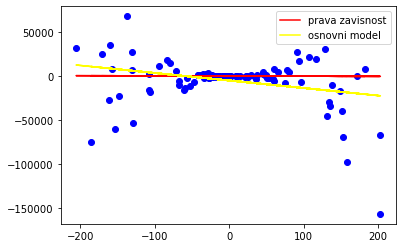

In [12]:
plt.scatter(x, y, color='blue')
plt.plot(x, 3 - 2*x, color='red', label='prava zavisnost')
plt.plot(x, beta0 + beta1*x, color='yellow', label='osnovni model')
plt.legend(loc='best')
plt.show()

Prikazaćemo i grafik reziduala.

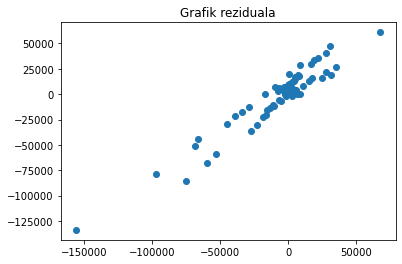

In [13]:
plt.scatter(y, y - model.predict(x))
plt.title('Grafik reziduala')
plt.show()

## Model linearne regresije sa tezinama

Kod modela linearne regresije sa težinama umesto sume kvadrata reziduala minimizuje se njihova težinska suma

$$\frac{1}{N} \sum_{i=1}^{N} \omega_i (\beta x_i - y_i)^2$$

Koeficijenti $\omega_i$ predstavljaju težine koje se pridružuju instancama, odnosno rezidualima. Za vrednosti $\omega_i = 1$ dobija se osnovni oblik problema linearne regresije. Algebarska forma rešenja problema linearne regresije sa težinama je $\beta = (X^TWX)^{-1}X^TWy$, gde je matrica $W$ dijagonalna matrica sa vrednostima $\omega_1$, ..., $\omega_N$ na glavnoj dijagonali (tzv. matrica težina).

Model linearne regresije sa težinama je pogodan u slučaju heteroskedastičnih skupova podataka ili kada želimo da postignemo visoku tačnost modela za pojedine instance skupa podataka, npr. one koje su jako česte ili koje su od posebnog značaja za fenomen koji se modeluje.

Model se konstruiše na isti način, funkcijom <code>Linearregression()</code>.

In [14]:
improved_model = linear_model.LinearRegression()

Prilikom poziva metoda <code>fit()</code> težine pojedinačnih instanci zadaju se parametrom <code>sample_weight</code>. U našem primeru instancama kod kojih je mala varijansa ciljne promenljive treba pridružiti veće težine kako bi model bio sigurniji, a instancama kod kojih je varijansa velika manje težine. To možemo postići uzimanjem reciprocne vrednosti varijanse $\omega_i = \frac{1}{\sigma_i^2}$ za vrednosti težina.

In [15]:
weights = 1 / (1 + 0.5*(3 - 2*x)**2)

In [16]:
improved_model.fit(x, y, sample_weight=weights.ravel())

LinearRegression()

In [17]:
beta0_improved = improved_model.intercept_[0]
beta1_improved = improved_model.coef_[0][0]

In [18]:
print('Koeficijenti modela: ', beta0_improved, beta1_improved)

Koeficijenti modela:  1.2357792136826893 -17.005671954066877


Prikazaćemo na istom grafiku skup podataka, linearnu funkcija kojom smo generisali skup podataka, osnovni i unapređeni model linearne regresije.

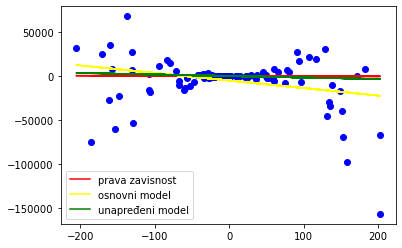

In [19]:
plt.scatter(x, y, color='blue')
plt.plot(x, 3 - 2*x, color='red', label='prava zavisnost')
plt.plot(x, beta0 + beta1*x, color='yellow', label='osnovni model')
plt.plot(x, beta0_improved + beta1_improved*x, color='green', label='unapređeni model')
plt.legend(loc='best')
plt.show()

Primetimo da smo sa otežavanjem instanci postigli da se model bolje prilagodi pravoj zavisnosti u podacima.

Prikazacemo i grafik reziduala pomnoženih odgovarajućim težinama.

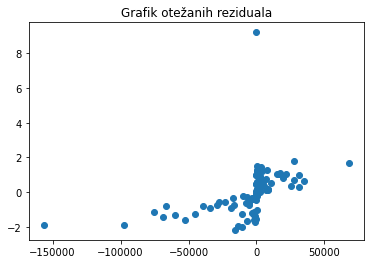

In [20]:
plt.scatter(y, weights * (y - improved_model.predict(x)))
plt.title('Grafik otežanih reziduala')
plt.show()